In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import model training packages
from sklearn.model_selection import train_test_split

# Making pipeline import
from sklearn.pipeline import make_pipeline

# Load the dataset
dataset_path = '../data/original_data/dataset.csv'
df = pd.read_csv(dataset_path)

# Removing Empty Column
df.drop(columns=['id','Unnamed: 32'],inplace=True)

# Move diagnosis to be last column
df['diagnosis'] = df.pop('diagnosis')

# Display the first few rows of the dataset
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [110]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, RidgeClassifierCV, SGDClassifier

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, HistGradientBoostingClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.naive_bayes import BernoulliNB, GaussianNB

from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid

from sklearn.neural_network import MLPClassifier

from sklearn.svm import LinearSVC, NuSVC, SVC

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

# tree.export_graphviz(decision_tree[, ...])
# Export a decision tree in DOT format.
# tree.export_text(decision_tree, *[, ...])
# Build a text report showing the rules of a decision tree.

# Prepare X_train, X_test, y_train, y_test
X = df.drop(columns='diagnosis')
y = df['diagnosis']

# Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For Gausian Classifier
kernel = 1.0 * RBF(1.0)

models = [
    ('LogisticRegression', LogisticRegression(random_state=42,max_iter=1000)),
    ('LogisticRegressionCV', LogisticRegressionCV(cv=50, random_state=42,max_iter=1000)),
    ('PassiveAggressiveClassifier', PassiveAggressiveClassifier(random_state=42)),
    ('Perceptron',Perceptron(random_state=42)),
    ('RidgeClassifier',RidgeClassifier(random_state=42)),
    ('RidgeClassifierCV',RidgeClassifierCV(cv=50)),
    ('SGDClassifier',SGDClassifier(random_state=42)),
    ('AdaBoostClassifier',AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)),
    ('BaggingClassifier',BaggingClassifier(n_estimators=10, random_state=42)),
    ('ExtraTreesClassifier',ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('GradientBoostingClassifier',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42)),
    ('RandomForestClassifier',RandomForestClassifier(max_depth=2, random_state=42)),
    ('HistGradientBoostingClassifier',HistGradientBoostingClassifier()),
    ('GaussianProcessClassifier',GaussianProcessClassifier(kernel=kernel,random_state=42)),
    ('BernoulliNB',BernoulliNB()),
    ('GaussianNB',GaussianNB()),
    ('KNeighborsClassifier',KNeighborsClassifier()),
    ('RadiusNeighborsClassifier',RadiusNeighborsClassifier(radius=8.0)),
    ('NearestCentroid',NearestCentroid()),
    ('MLPClassifier',MLPClassifier(max_iter=1000,random_state=42)),
    ('LinearSVC',LinearSVC(dual=True)),
    ('NuSVC',NuSVC(random_state=42)),
    ('SVC',SVC(random_state=42)),
    ('DecisionTreeClassifier',DecisionTreeClassifier(random_state=42)),
    ('ExtraTreeClassifier',ExtraTreeClassifier(random_state=42))
]

# Make pipeline
def run_pipelines(X_train,y_train,models) -> list:
    scores = []
    for name, model in models:
        pipe = make_pipeline(StandardScaler(), model)
        pipe.fit(X_train, y_train)
        score = pipe.score(X_test, y_test)
        scores.append([name,score])
    return scores

model_scores = run_pipelines(X_train, y_train, models)

df_models = pd.DataFrame(model_scores,columns=['model','score'])

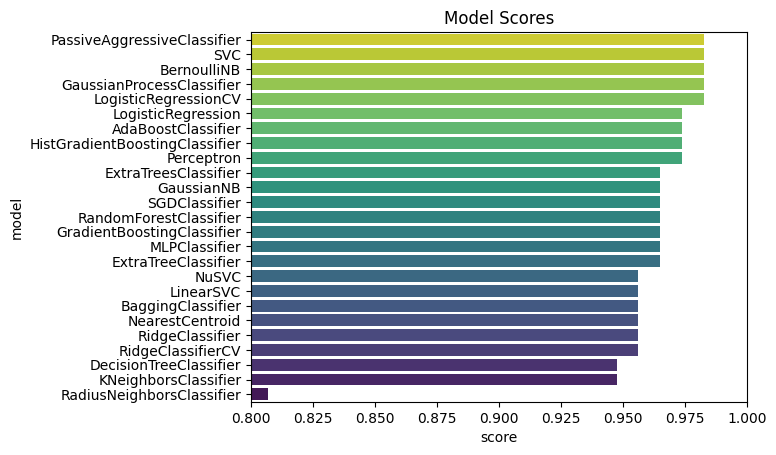

In [135]:
df_models.sort_values(by='score',ascending=False, inplace=True)
df_models.reset_index(drop=True)
sns.barplot(df_models, x='score', y='model',palette='viridis_r',hue='model')
plt.xlim([0.8,1])
plt.title('Model Scores')
plt.show()